### Math Review : 1- Matrix Decomposition

` The eigendecomposition of the square matrix A is a product of three matrices: `

<img src='../../images/eign.png'>

`where : `

`Q : eignvectors where [1,2] first eignvector and [2,-1] is the second one`

`Λ : eignvalues matrix where first eignvalue is 5 and second is 10`

`also every eign value corresponds to every eignvector`

`in above example [1,2] >>> 5 and [2,-1] >>> 10`

`Q−1 : Q inverse`

`note that eignvectors represent a direction and eignvalues represent tha magnitude of the corresponding eignvector`

### Math Review : 2- Variance and Covariance

`Variance measures the variation of a single random variable (like the height of a person in a population), whereas covariance is a measure of how much two random variables vary together`

`variance equation`

<img src='../../images/var.png'>

`covariance equation`

<img src='../../images/cov.png'>

`covariance matrix`

`which is a square matrix given by `

<img src='../../images/covmat.png'>

`where d describes the dimension or number of random variables of the data`

In [1]:
# this example shows you how to perform matrix eigndecomposition in numpy
import numpy as np
np.random.seed(3)
from numpy.linalg import eig # https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html
A = np.random.randint(low=0,high=20,size=(4,4)) # generate square matrix with random integer values
print("matrix A >>> \n",A)
eignvalues , eignvectors = eig(A)
print("eignvalues >>> \n",eignvalues)
print("eignvectors >>> \n",eignvectors)
print("link between eignvalues and eignvectors \n")
for i in range(eignvalues.shape[0]):
    print("eignvalue {} >>> eignvector {}".format(eignvalues[i],eignvectors[i]))

matrix A >>> 
 [[10  3  8  0]
 [19 10 11  9]
 [10  6  0 12]
 [ 7 14 17  2]]
eignvalues >>> 
 [ 32.17124392 -14.73215644   4.22643543   0.3344771 ]
eignvectors >>> 
 [[-0.2377868  -0.23243     0.53755095 -0.26700846]
 [-0.64963482  0.13373639  0.16946972 -0.59051775]
 [-0.41539059  0.66841074 -0.45149929  0.54404121]
 [-0.59066293 -0.69377083 -0.69171337  0.53293004]]
link between eignvalues and eignvectors 

eignvalue 32.17124391733927 >>> eignvector [-0.2377868  -0.23243     0.53755095 -0.26700846]
eignvalue -14.732156443348027 >>> eignvector [-0.64963482  0.13373639  0.16946972 -0.59051775]
eignvalue 4.226435425897828 >>> eignvector [-0.41539059  0.66841074 -0.45149929  0.54404121]
eignvalue 0.33447710011095094 >>> eignvector [-0.59066293 -0.69377083 -0.69171337  0.53293004]


### What is PCA

`It is a way of identifying patterns in data , once you have found these patterns in the data, then you can compress the data, ie. by reducing the number of dimensions, without much loss of information`

### How PCA Works

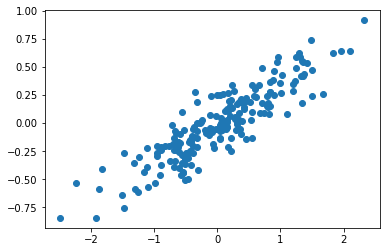

In [2]:
# first we will generate dummy 2 features dataset
import matplotlib.pyplot as plt
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])

In [3]:
# Step 1 : For PCA to work properly, you have to subtract the mean from each of the data dimensions (kind of normaliztion)
X[:,0]-=np.mean(X[:,0])
X[:,1]-=np.mean(X[:,1])
print("Samples of New X >>> \n",X[:5,:])

Samples of New X >>> 
 [[-0.6588133  -0.16598294]
 [ 0.92718335  0.59498131]
 [-0.63205507 -0.39851268]
 [-2.26157106 -0.52849602]
 [-0.49494174 -0.49478653]]


In [4]:
# Step 2 : Compute covariance matrix of the features
covmat = np.cov(X[:, 0], X[:, 1])
print("covriance matrix >>> \n",covmat)

covriance matrix >>> 
 [[0.68217761 0.23093475]
 [0.23093475 0.09883179]]


In [5]:
'''
Step 3 :
Since the covariance matrix is square, we can calculate the eigenvectors and eigenvalues for this matrix. These are rather important, as they tell us useful information about
our data. I will show you why soon. In the meantime, here are the eigenvectors and
eigenvalues
'''
eignvalues , eignvectors = eig(covmat)

print("eignvalues >>> \n",eignvalues)

print("eignvectors >>> \n",eignvectors)

eignvalues >>> 
 [0.7625315 0.0184779]
eignvectors >>> 
 [[ 0.94446029 -0.32862557]
 [ 0.32862557  0.94446029]]


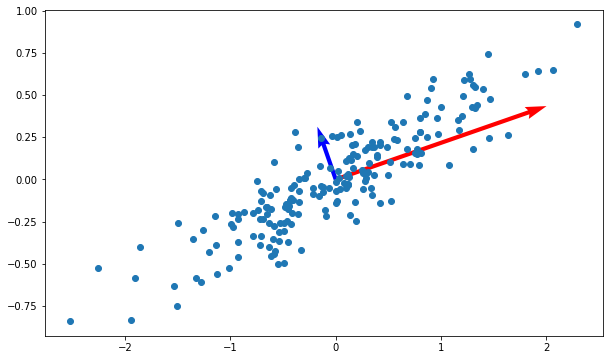

In [6]:
# Plot principal components
origin = [0, 0]

eig_vec1 = 0.4*eignvectors[:,0] # note 0.4 and 0.1 used for better visualizations
eig_vec2 = 0.1*eignvectors[:,1]

plt.figure(figsize=(10,6))
plt.quiver(*origin, *eig_vec1, color=['r'], scale=1)
plt.quiver(*origin, *eig_vec2, color=['b'], scale=1)
plt.scatter(X[:, 0], X[:, 1])
plt.show()

`
what do this mean ?
note first eignvector [0.944,0.328] corresponds to eignvalue of 0.76 the other one is 0.018 , that means that first eignvetor is more important in describing the distribution of the data—more precisely, it is a measure of the variance of the data when projected onto that axis`
`so this 2 feature data can be transformed into 1 dimention without losing much information`

`Now, if you like, you can decide to ignore the components of
lesser significance. You do lose some information, but if the eigenvalues are small, you
don’t lose much. If you leave out some components, the final data set will have less
dimensions than the original. To be precise, if you originally have n dimensions in
your data, and so you calculate n eigenvectors and eigenvalues, and then you choose
only the first k eigenvectors where (k < n) , then the final data set has only k dimensions.`

In [10]:
# Step 4 : Data Compression (transformation)
# simply dot product between X and choosen eignvector
newdata = np.dot(X,eignvectors[:,0])
# check new data shape
print("new data shape >>> \n",newdata.shape)

new data shape >>> 
 (200,)


### PCA in sklearn as dimention reduction algorithm

In [16]:
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA
from sklearn.decomposition import PCA
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
pca = PCA(n_components=2)
pca.fit(X)
print("Data >>> \n",X)
print("eign values (variance) >>> \n",pca.explained_variance_)
print("eign vectors (principal components ) >>> \n",pca.components_)

Data >>> 
 [[-1 -1]
 [-2 -1]
 [-3 -2]
 [ 1  1]
 [ 2  1]
 [ 3  2]]
eign values (variance) >>> 
 [7.93954312 0.06045688]
eign vectors (principal components ) >>> 
 [[-0.83849224 -0.54491354]
 [ 0.54491354 -0.83849224]]


In [ ]:
# note : for new samples (production data) use >>> pca.transform(new_sample) 

In [11]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

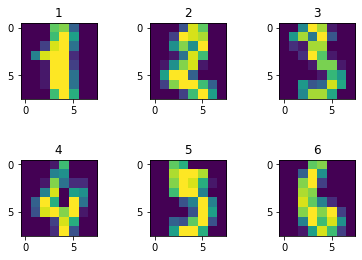

In [12]:
# plot sample of data
import matplotlib.pyplot as plt
fig = plt.figure()
fig.subplots_adjust(hspace=0.7, wspace=0.7)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    plt.imshow(np.reshape(digits.data[i],newshape=(8,8)))
    plt.title(digits.target[i])

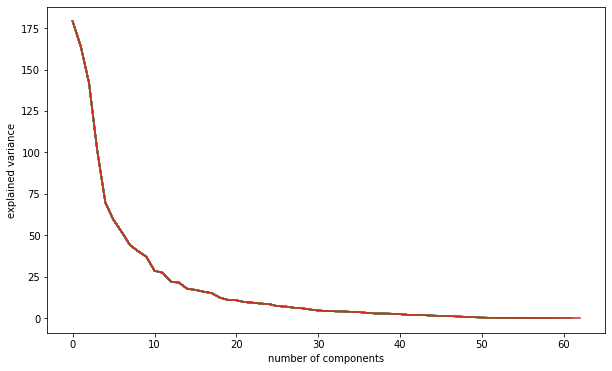

In [23]:
'''
assume that 64 features as input to our model is large number of features
and you suspect that model will overfit the data with these features ,
then you can use PCA to reduce number of features ,
but a very importnat questions rises , what is the number of new features ?? 
to answer this question check below figure
'''
plt.figure(figsize=(10,6))
for c in range (64): # num of features
    pca = PCA(n_components=c).fit(digits.data) # we fit PCA with all values from 1 >> 64
    plt.plot(pca.explained_variance_) # changes components vs variance
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.show()

`This curve quantifies how much of the total, 64-dimensional variance is contained within the first N components. For example, we see that with the digits the first 16 components contain approximately 75% of the variance, while you need around 50 components to describe close to 100% of the varianc`

In [24]:
# after applying pca
digits_new=PCA(n_components=16).fit_transform(digits.data)
print("new features : {} ".format(digits_new.shape))

new features : (1797, 16) 


In [26]:
'''assignment : trainee is encouraged to apply PCA to reduce data dimentions on any of the projects he/she submitted
just to see its effect and how this algorithm can reduce data dimentions which may result in more powerful machine learning models
'''

'assignment : trainee is encouraged to apply PCA to reduce data dimentions on any of the projects he/she submitted\njust to see its effect and how this algorithm can reduce data dimentions which may result in more powerful machine learning models\n'